In [1]:
import pandas as pd
from utils import *
from xgboost import XGBClassifier

In [2]:
PATH_TRAIN = "../processed_data/cleaned_data/clean_data.csv"
PATH_TEST = "../processed_data/cleaned_data/clean_test_data.csv"

train_df = pd.read_csv(PATH_TRAIN)
test_df = pd.read_csv(PATH_TEST)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Train data shape: (13056, 91)
Test data shape: (3091, 91)


In [3]:
X_train = train_df.drop(["Participant_ID", "Depression"], axis=1)
y_train = train_df[["Participant_ID", "Depression", "Gender"]]

X_test = test_df.drop(["Participant_ID", "Depression"], axis=1)
y_test = test_df[["Participant_ID", "Depression", "Gender"]]

In [16]:
bst = XGBClassifier(n_estimators=50, max_depth=500, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train['Depression'])
y_test["Depression_predicted"] = bst.predict(X_test)

/var/folders/6m/wg76ryq57fnb356nt5xwlbl80000gn/T/ipykernel_40106/2981394576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test["Depression_predicted"] = bst.predict(X_test)


Accuracy: 0.75
Balanced Accuracy: 0.5833333333333334
Equality of Opportunity: 0.8


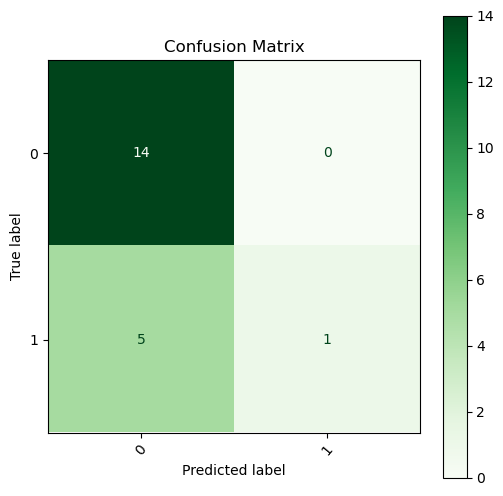

In [17]:
acc, bal_acc, eo_score = compute_metrics(y_test, eo=True)
print(f"Accuracy: {acc}")
print(f"Balanced Accuracy: {bal_acc}")
print(f"Equality of Opportunity: {eo_score}")
show_conf_matrix(y_test)